<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_3/Descriptive_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import numpy as np
import matplotlib.transforms as transforms

# Numerical Descriptive Measures

In this module, we will be covering the topics of numerical descriptive measures. This provides the foundation for analyzing data as information.
Module Learning Objectives:
Calculate and interpret central tendency
Interpret percentiles and boxplots
Calculate and interpret the mean, variance, and standard deviation
Explain mean-variance analysis and the Sharpe ratio
Apply Chebyshev's theorem, the empirical rule, and z-scores
Calculate and interpret measures of association


## Measures of Central Tendency

In [8]:
# read in dataframe directly from source, to ensure reproducible research
df = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch03_Data_Files.xlsx",
                   sheet_name='Growth_Value')

In [12]:
df.head()

,Growth,Value
Year,,
1984,-5.50,-8.59
1985,39.91,22.10
1986,13.03,14.74
1987,-1.70,-8.58
1988,16.05,29.05


In [4]:
df.shape

(36, 3)

In [11]:
# lets visualize the time series
df.set_index('Year',inplace=True)

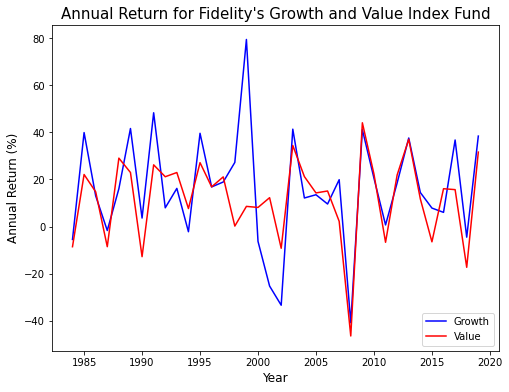

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df['Growth'].plot(c='b', ax = ax)
df['Value'].plot(c='r', ax = ax)
plt.legend(loc=4)
plt.title("Annual Return for Fidelity's Growth and Value Index Fund", size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Annual Return (%)', size=12)
plt.show()

Here is a time series of the annual return in blue for the Growth stock, in Red is the value fund performance. We see some particular trends with a dip around 2008 during the financial crisis, it also appears the growth fund had a peak and then fell between the year 2000 and 2003, whereas the Growth fund remained more steady.

In [13]:
# let's analyze the central tendency

def calc_mean(vals):
  """
  Calculate the mean from a series of numeric values
  """
  return vals.sum()/len(vals)

In [16]:
growth_mean = calc_mean(df['Growth'])

In [17]:
print(f"The Growth fund average annual return is: {round(growth_mean,2)}%")

The Growth fund average annual return is: 15.76%


In [18]:
value_mean = calc_mean(df['Value'])

In [19]:
print(f"The Value fund average annual return is: {round(value_mean,2)}%")

The Value fund average annual return is: 12.01%


Let's plot the mean to see how the central tendency would look over time.

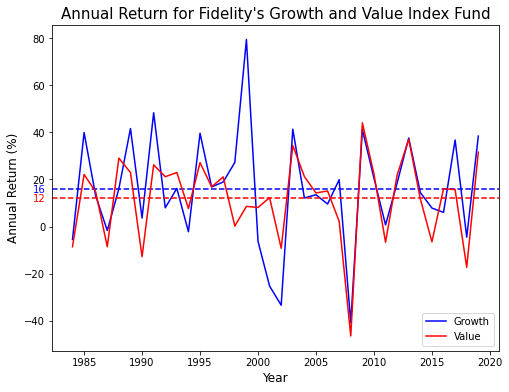

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df['Growth'].plot( c='b', ax = ax)
plt.axhline(y=growth_mean, color='b', linestyle='--')
df['Value'].plot(c='r', ax = ax)
plt.axhline(y=value_mean, color='r', linestyle='--')
plt.legend(loc=4)
plt.title("Annual Return for Fidelity's Growth and Value Index Fund", size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Annual Return (%)', size=12)

# annotate the means
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,growth_mean, "{:.0f}".format(growth_mean), color="b", transform=trans, 
        ha="right", va="center")
ax.text(0,value_mean, "{:.0f}".format(value_mean), color="r", transform=trans, 
        ha="right", va="center")
plt.show()

Rather than use the function, we can use the method of .mean() to calculate the average.

In [21]:
# can also use mean function in pandas

df['Value'].mean(), df['Growth'].mean()

(12.004999999999999, 15.755000000000003)

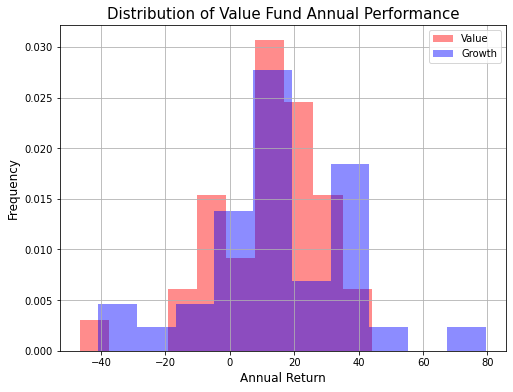

In [22]:
# visualize the distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df['Value'].hist(ax=ax, density=True, color='r', alpha=.45, label='Value')
df['Growth'].hist(ax=ax, density=True, color='b', alpha=.45, label='Growth')
plt.xlabel('Annual Return', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Distribution of Value Fund Annual Performance', size=15)
plt.legend()
plt.show()

Where the value was around -40% annual return. We can observe the distribution of values using a histogram to see the central tendency differences between the funds, and how both have outliers around -40 percent, where the growth fund also has an outlier near a positive 80% annual return. Having a value that is far away from the cluster of the central mean can skew the sample mean. 

## Median and Mode

In [49]:
def find_median(df_col):
  """
  Identify the median from a dataframe column
  """
  # sort all values
  df_values = df_col.sort_values()
  # calculate the length
  n = len(df_values)

  # if there is more than one middle value
  if n % 2 == 0: # check if even number
    median1 = df_values[n//2]
    median2 = df_values[n//2 - 1]
    # take average of the two middle values
    median = (median1 + median2)/2
  else:
    median = df_values[n//2]
  return median
    

In [42]:
df.reset_index(inplace=True)

In [43]:
df['Value'].sort_values()[18]

-9.25

In [50]:
find_median(df['Value'])

1.5

In [48]:
# or we can use the function
df['Value'].median()

15.379999999999999

In [51]:
def find_mode(df_col):
  """
  Identify the mode from a dataframe column
  """
  from collections import Counter
  # calculate length
  n = len(df_col)

  # create counter for finding most frequent number
  data = Counter(df_col)
  print(data)
  # make a dictionary to obtain the highest value
  get_mode = dict(data)
  # obtain maximum by iterating through dictionary
  mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]

  if len(mode) == n:
    get_mode = "No mode found"
  else:
    get_mode = mode
  return get_mode

In [52]:
find_mode(df['Value'])

Counter({-8.59: 1, 22.1: 1, 14.74: 1, -8.58: 1, 29.05: 1, 22.95: 1, -12.82: 1, 26.2: 1, 21.15: 1, 22.94: 1, 7.63: 1, 27.13: 1, 16.85: 1, 21.08: 1, 0.18: 1, 8.55: 1, 8.1: 1, 12.25: 1, -9.25: 1, 34.43: 1, 21.21: 1, 14.27: 1, 15.09: 1, 2.21: 1, -46.52: 1, 44.08: 1, 22.27: 1, -6.71: 1, 21.9: 1, 37.07: 1, 11.72: 1, -6.51: 1, 16.06: 1, 15.67: 1, -17.34: 1, 31.62: 1})


'No mode found'

In [54]:
# example for mode when there is one
test = [5,5,5,6,1]

In [58]:
find_mode(test)

Counter({5: 3, 6: 1, 1: 1})


[5]

In [57]:
pd.DataFrame(test)

,0
0,5
1,5
2,5
3,6
4,1


In [56]:
pd.DataFrame(test).mode()

,0
0,5


In [53]:
# use the function to show that no value shows up more than once
df['Value'].mode()

0    -46.52
1    -17.34
2    -12.82
3     -9.25
4     -8.59
5     -8.58
6     -6.71
7     -6.51
8      0.18
9      2.21
10     7.63
11     8.10
12     8.55
13    11.72
14    12.25
15    14.27
16    14.74
17    15.09
18    15.67
19    16.06
20    16.85
21    21.08
22    21.15
23    21.21
24    21.90
25    22.10
26    22.27
27    22.94
28    22.95
29    26.20
30    27.13
31    29.05
32    31.62
33    34.43
34    37.07
35    44.08
dtype: float64

## Other descriptive measures

In [59]:
# show count, mean, standard deviation, percentiles
df.describe()

,Year,Growth,Value
count,36.000000,36.000000,36.000000
mean,2001.500000,15.755000,12.005000
std,10.535654,23.799285,17.979187
min,1984.000000,-40.900000,-46.520000
25%,1992.750000,2.860000,1.702500
50%,2001.500000,15.245000,15.380000
75%,2010.250000,36.972500,22.437500
max,2019.000000,79.480000,44.080000


In [60]:
# other functions to measure central location
f"The maximum value is: {df['Value'].max()}, the minimum value is {df['Value'].min()}"

'The maximum value is: 44.08, the minimum value is -46.52'

In [61]:
# find the percentile
np.percentile(df['Value'], 50) # return the 50th percentile, e.g median

15.379999999999999

In [62]:
# mean absolute deviation
def find_MAD(df_col):
  """
  Calculate the mean absolute deviation
  """
  mu = df_col.mean() # calculate the mean
  n = len(df_col) # length of dataset
  all_differences = [] # list of all differences
  for i in df_col: # iterate through each value
    all_differences.append(abs(i-mu)) # take the difference for absolute value
  return sum(all_differences)/n # take the sum and divide by n

In [63]:
find_MAD(df['Value'])

13.666666666666666

In [64]:
find_MAD(df['Growth'])

17.490555555555552

We see that the MAD for Growth fund is higher than the Value fund, which implies the values are more disperesed for Growth.

In [65]:
# using the built in function
df['Value'].mad()

13.666666666666666

In [66]:
# variance
def find_variance(df_col):
  """
  Calculate the variance
  """
  mu = df_col.mean() # calculate the mean
  n = len(df_col) # length of dataset
  all_differences = [] # list of all differences
  for i in df_col: # iterate through each value
    all_differences.append((i-mu)**2) # take the difference and square it
  return sum(all_differences)/(n-1) # take the sum and divide by n - 1

In [67]:
find_variance(df['Value'])

323.25117428571434

In [68]:
# using the built in function
df['Value'].var()

323.25117428571434

In [69]:
find_variance(df['Growth'])

566.4059857142859

We see the variance is much greater for the Growth fund, implying that the annual returns vary more for the Growth fund. 

In [70]:
# standard deviation
def find_std(df_col):
  """
  Calculate the standard deviation
  """
  mu = df_col.mean() # calculate the mean
  n = len(df_col) # length of dataset
  all_differences = [] # list of all differences
  for i in df_col: # iterate through each value
    all_differences.append((i-mu)**2) # take the difference and square it
  return math.sqrt(sum(all_differences)/(n-1)) # take the sum and divide by n - 1, then take the square root

In [71]:
find_std(df['Value'])

17.97918725320236

In [72]:
# using the built in function
value_std = df['Value'].std()
value_std

17.97918725320236

In [73]:
find_std(df['Growth'])

23.799285403437764

In [74]:
growth_std = df['Growth'].std()
growth_std

23.799285403437764

The standard deviation brings the units back to an interpretable value, so we see that one standard deviation from the mean would be about 24% return for the Growth fund, and 18% for the Value fund. This can help measure the level of risk where the higher the fluctuations the higher the risk. A more stable fund with consistent returns would be less risky.

In [75]:
# coefficient of variation
find_std(df['Growth'])/df['Growth'].mean()

1.510586188729785

In [76]:
# using the built-in function
scipy.stats.variation(df['Growth'])

1.4894580686289638

In [77]:
scipy.stats.variation(df['Value'])

1.4766945193007466

Interesting to see the coefficient of variation is about the same, we can infer that both funds have a similar level of dispersion around the mean. This is a meausre of relative variability.

In [78]:
# skewness
df['Value'].skew()

-1.0235910814635056

We see the annual returns are negatively skewed and we can assume that extreme values lie to the left of the mean. 

In [79]:
# kurtosis
df['Value'].kurtosis()

1.8533507615120426

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

Kurtosis is the measure of "tailedness", to measure what proportion of the data is in the tail. The kurtosis of a normal distribution is zero, the higher the kurtosis the heavier the tail

### Subsetted Means

Understanding the sample vs population. 

Consider the example of spending patterns during the holiday season, the following dataframe contains 130 existing customers,demographic data and $ spent on different categories of retail.

Let's calculate the average for each category between male and female customers. This will help direct marketing for the target market for each product category.

In [80]:
df1 = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch03_Data_Files.xlsx",
                   sheet_name='Online')

In [81]:
df1.head()

,Customer,Sex,Clothing,Health,Tech,Misc
0,1,Female,246,185,64,75
1,2,Male,171,78,345,10
2,3,Female,95,15,47,90
3,4,Male,125,16,493,13
4,5,Female,368,100,82,109


In [82]:
# print out all columns
df1.columns

Index(['Customer', 'Sex', 'Clothing', 'Health', 'Tech', 'Misc'], dtype='object')

In [83]:
# group by male and female and then calcualte the mean
df1.groupby(['Sex'])[['Clothing', 'Health', 'Tech', 'Misc']].mean()

,Clothing,Health,Tech,Misc
Sex,,,,
Female,225.666667,100.250000,47.097222,159.875000
Male,97.931034,100.637931,310.965517,85.844828


# Percentiles and Boxplots

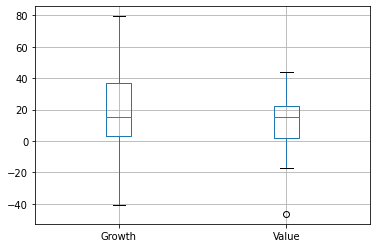

In [84]:
df.boxplot(column=['Growth', 'Value'])

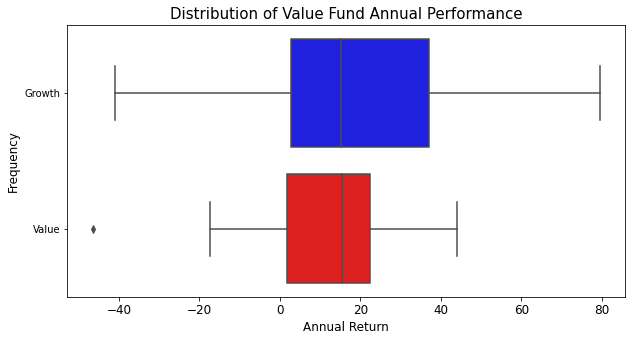

In [85]:
# using seaborne
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# set the colors
my_pal = {"Growth": "b", "Value": "r"}
sns.boxplot(data=df[['Growth', 'Value']], ax=ax, orient="h", palette=my_pal)
plt.xticks(size=12)
plt.xlabel('Annual Return', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Distribution of Value Fund Annual Performance', size=15)
plt.show()

We see the median which is the middle line is actually the same between the two funds. The edges of the box show the 25th and 75th percentiles and the whiskers from the plot show the range of values. Notice for the value we have a diamond that shows the outlier that is not included in the percentile calculation automatically.

It seems the Growth has a wider distribution of values with more values above the median. Comapred to the Value fund that has shorter range of values and are more centralized to the median.


## Analysis of Relative Location

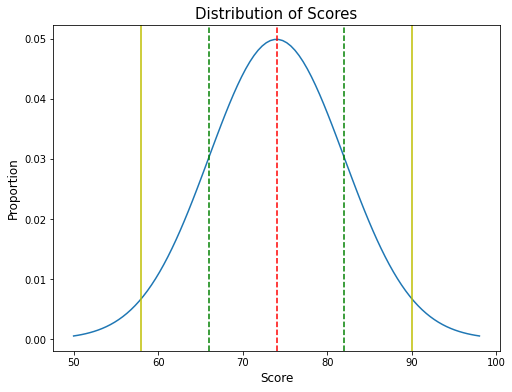

In [86]:
# visualize distribution
mu = 74
std = 8
x = np.linspace(mu - 3*std, mu + 3*std, 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(x, scipy.stats.norm.pdf(x, mu, std))
plt.axvline(x=mu, color='r', linestyle='--')
plt.axvline(x=58, color='y', linestyle='-')
plt.axvline(x=90, color='y', linestyle='-')
plt.axvline(x=mu-std, color='g', linestyle='--')
plt.axvline(x=mu+std, color='g', linestyle='--')
plt.xlabel('Score', size=12)
plt.ylabel('Proportion', size=12)
plt.title('Distribution of Scores', size=15)
plt.show()

We see a normal distribution of scores, where the red line is the mean and 2 standard deviations away is yellow. The scores of 58 and 90 are 2 standard devations from the mean. Which using chebyshev's theorem is .75 or 75% of the observations fall within this interval.


### Outliers

We use the z-score to determine if there are any outliers, observations that fall outside of 3 standard deviations are considered to be an outlier.

Let's evaluate the Growth and Value fund data for any outliers.

In [87]:
growth_mean, growth_std

(15.754999999999999, 23.799285403437764)

In [88]:
value_mean, value_std

(12.005000000000003, 17.97918725320236)

In [89]:

def find_outlier(df_col):
  """
  Calculates z score and compares it to threshold of 3 as an outlier
  """
  threshold = 3
  print("Highest allowed",df_col.mean() + threshold*df_col.std())
  print("Lowest allowed",df_col.mean() - threshold*df_col.std())

  print(f"Highest Value: {df_col.max()}, lowest value: {df_col.min()}")
  outlier = []
  for i in df_col:
      z = (i-df_col.mean())/df_col.std()
      if z >= threshold or z <= -threshold :
          outlier.append(i)
  print('outlier in dataset is', outlier)
  return outlier

In [90]:
find_outlier(df['Growth'])

Highest allowed 87.1528562103133
Lowest allowed -55.64285621031329
Highest Value: 79.48, lowest value: -40.9
outlier in dataset is []


[]

In [91]:
find_outlier(df['Value'])

Highest allowed 65.94256175960709
Lowest allowed -41.93256175960708
Highest Value: 44.08, lowest value: -46.52
outlier in dataset is [-46.52]


[-46.52]

We see in the value fund there is one outlier that was detected by our box plot.

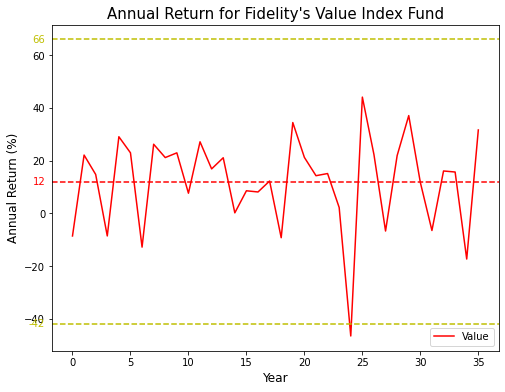

In [92]:
# let's visualize over time

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df['Value'].plot(c='r', ax = ax)
plt.axhline(y=value_mean, color='r', linestyle='--')
plt.axhline(y=value_mean+(value_std*3), color='y', linestyle='--')
plt.axhline(y=value_mean-(value_std*3), color='y', linestyle='--')
plt.legend(loc=4)
plt.title("Annual Return for Fidelity's Value Index Fund", size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Annual Return (%)', size=12)

# annotate the means
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,value_mean, "{:.0f}".format(value_mean), color="r", transform=trans, 
        ha="right", va="center")
ax.text(0,value_mean+(value_std*3), "{:.0f}".format(value_mean+(value_std*3)), color="y", transform=trans, 
        ha="right", va="center")
ax.text(0,value_mean-(value_std*3), "{:.0f}".format(value_mean-(value_std*3)), color="y", transform=trans, 
        ha="right", va="center")
plt.show()

We can visualize what 3 standard deviations below and above the mean would look like and see that in 2008 the annual return reached below -42% and can be considered an outlier. Such observations should be reviewed to determine if they should remain in the data set.

## Measures of Association

### Covariance

Text(0, 0.5, 'Value')

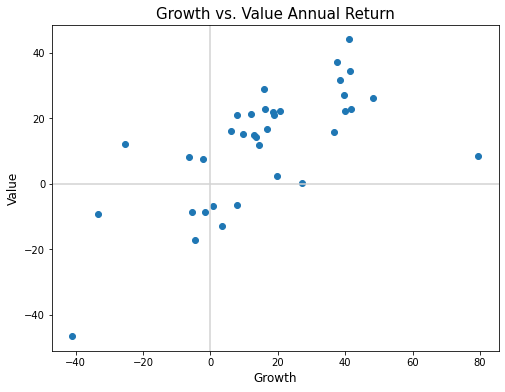

In [93]:
# visualize scatterplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.scatter(x = df['Growth'], y= df['Value'])
plt.axhline(y=0, color='lightgrey', linestyle='-')
plt.axvline(x=0, color='lightgrey', linestyle='-')
plt.title("Growth vs. Value Annual Return", size=15)
plt.xlabel('Growth', size=12)
plt.ylabel('Value', size=12)

We see there is a positive relationship between the annual return between the growth and value fund, perhaps indicating that if one does well, the other fund tends to do well too. Intuitively this makes sense because the stock market would likely deliver similar waves between the two funds.

In [94]:
def calc_covariance(df_col_x, df_col_y):
  """
  Calculates the covariance between two series
  """
  mu_x = df_col_x.mean() # calculate the mean of x
  mu_y = df_col_y.mean() # calculate the mean of y
  n = len(df_col_x) # length of dataset
  differences = [] # list of all differences

  for x,y in zip(df_col_x,df_col_y) : # iterate through each value pair
    # subtract the x from mean of x, subtract y from the mean of y
    differences.append((x-mu_x)*(y-mu_y)) # multiply the difference

  return sum(differences)/(n-1) # take the sum and divide by n - 1

In [95]:
calc_covariance(df['Growth'], df['Value'])

285.6054485714285

In [96]:
# covariance
np.cov(m= df['Growth'], y=df['Value'])

array([[566.40598571, 285.60544857],
       [285.60544857, 323.25117429]])

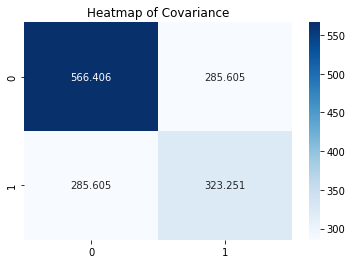

In [97]:
sns.heatmap(np.cov(m= df['Growth'], y=df['Value']), cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of Covariance')
plt.show()

We see the covariance we calcualted of 285 when x is considered Growth, and Y is value. We also can see the covariance matrix showing what is the covariance of the other combinations.

In [98]:
calc_covariance(df['Growth'], df['Growth'])

566.4059857142859

In [99]:
calc_covariance(df['Value'], df['Value'])

323.25117428571434

In [100]:
def calc_correlation(df_col_x, df_col_y):
  """
  Calculates the correlation between two series
  """
  mu_x = df_col_x.mean() # calculate the mean of x
  mu_y = df_col_y.mean() # calculate the mean of y
  n = len(df_col_x) # length of dataset
  differences = [] # list of all differences

  for x,y in zip(df_col_x,df_col_y) : # iterate through each value pair
    # subtract the x from mean of x, subtract y from the mean of y
    differences.append((x-mu_x)*(y-mu_y)) # multiply the difference
  covariance = sum(differences)/(n-1)
  correlation = covariance/(df_col_x.std() * df_col_y.std())
  return correlation

In [101]:
calc_correlation(df['Growth'], df['Value'])

0.6674711754790303

In [102]:
# correlation using function
df[['Growth', 'Value']].corr()

,Growth,Value
Growth,1.000000,0.667471
Value,0.667471,1.000000


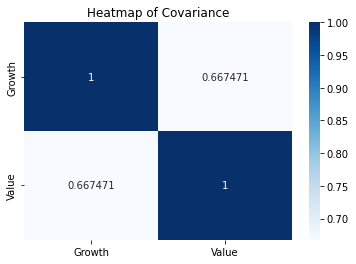

In [103]:
sns.heatmap(df[['Growth', 'Value']].corr(), cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of Covariance')
plt.show()

We see the correlation of a value to itself is 1. Since we divide by the standard deviation, it cancels the variation out and leaves a perfectly correlated (and meaningless) relationship. 